<a href="https://colab.research.google.com/github/kenca5ey/et5003/blob/main/ET5003_Etivity2_KennethCasey_20197764.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**
## ET5003 - MACHINE LEARNING APPLICATIONS 

### Instructor: Enrique Naredo
### ET5003_Etivity-2

In [1]:
#@title Current Date
Today = '2021-09-22' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20197764" #@param {type:"string"}
Student_full_name = "Kenneth Casey" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Final' #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# Task: 

You have to create a  piecewise regression model following the guidelines from the notebook provided to predict the house price using the provided dataset in the GitHub repository.

1. Get the dataset: train, test, and true price.

2. Analyse the dataset and decide what features to use.

3. Clean the dataset: remove nan's and possible outliers.

4. You could remove registers with 0 bathrooms and 0 bedrooms.

5. Your goal is to use a piecewise regression to solve this problem.

6. Follow the guidelines from the example provided.

7. Apply a full model first as a baseline.

8. You could select longitude and latitude to create clusters.

9. Use the number of clusters your model returns.

10. Apply a model to each cluster.

11. Analyse the results and give a comparison from both approaches

12. You could split the training to get a validation dataset.

13. Take notes from all the experiment results and bring your insights in your summary.

# INTRODUCTION

For this Etivity, the focus is to utilise two supervised learning methods and compare them. The models will be tailored to predict house prices based on several input variables. On one hand, we will create a single Bayesian regression model which is trained upon all the training data available. On the other hand, we will set up a Piecewise Bayesian regression approach where the training data is first split into clusters before separate Bayesian linear regression models are trained on each cluster’s data. 

As a main characteristic of supervised machine learning, a number of input features will be utilised as the basis of predicting an output (Nasteski, 2017). The input features in our case will be sourced from various attributes that we know about a set of properties and the output we are attempting to predict will price of the property. Known prices in the training data will be used to train the model, with the predicted values being compared to the actual values during training before the weights are iteratively adjusted. 

Exploratory Data Analysis will be initially carried out on the data to gain insights about its nature. Data cleaning will then be performed to deal with outliers and missing data. In some cases, whole data columns may need to be removed, such as when too much data is missing or when all the values are the same. For other columns, where only some data is missing, we may be able to impute the missing values from the other variables. Before training the model, we will make sure to scale the input variables appropriately so that they are readily consumable.

After the data has been adequately prepared, we will then begin training our models. Initially we will train a single model on all training data, and this will act as a baseline with which we can later compare the accuracy of the piecewise model.

As outlined by Yang et al. (2019), piecewise regression models first splits the data into segments or clusters and utilise specific models on each of the segments. This is particularly useful when there are different relationships between the variables in the different regions (‘Segmented regression’, 2021). In such cases, the different models are better able to learn the nuances in the relationships for each cluster, rather than over generalising which may occur in the case of a single universal model. The boundaries between segments are called breakpoints. Piecewise linear regression models have found many real-world applications from image denoising to data mining (Yang et al., 2019). In our case we will apply piecewise Bayesian regression to the task of predicting house prices and the clusters used will be geographic, based on latitude and longitude values.

In the below graph by Germano (2020) we can see that for the given problem the data falls into 3 distinct intervals, with each one having a different relationship between the variables. This is a good example of where piecewise linear regression is well suited, with the 3 red lines representing different models accurately describing their own portion of the overall system:

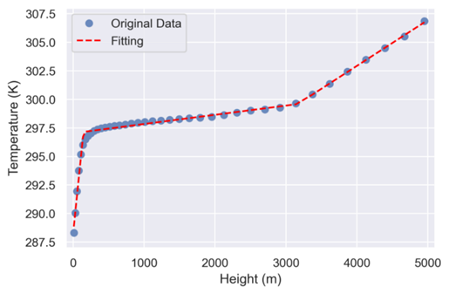

Trying to fit a single model on the above data would lead to some inaccurate predictions because the model would likely not be able to fit the nuances of each individual portion of the trend. Therefore a likely result of a single model would unsatisfactory and lead to something like the below graph which Germano (2020) also presents:

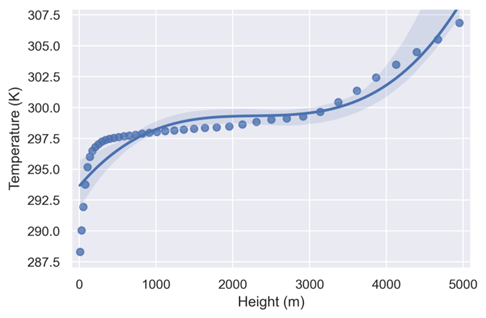

For an individual model we can take the linear regression formula as follows:

$$
f(x) = \alpha+\beta^T x
$$

We can then apply this in a piecewise fashion to each of the clusters as follows:

\begin{equation}
f(x) = \begin{cases}
\alpha_1+\beta_1^T x & \text{if } b_{0} \lt x \leq b_{1},\\
\alpha_2+\beta_2^T x & \text{if } b_{1} \lt x \leq b_{2},\\
...\\
\alpha_n+\beta_n^T x & \text{if } b_{n-1} \lt x \leq b_{n}\\
\end{cases}
\end{equation}

Where:

 - $x$ are the input features
 - $\alpha$ is the intercept term and
 - $\beta$ is vector of coefficients which give a weighting to the importance of each input feature. 

As (Koehrsen, 2018) outlines in his overview of Bayesian Linear Regression. For Bayesian Regression the response is drawn from a distribution rather than from a single value. The aim is to not find the single best model parameters but to get a posterior distribution for the parameters. The posterior probability stemming from Bayes Theorem can be derived and is the basis of inference using a Bayesian approach:

$Posterior = \frac{Liklihood \times Prior}{Normalization}$

A prior allows us to define as estimates any prior knowledge we have on a problem. If no prior knowledge is available then an initial guess can be used as well as taking from a a range such as a normal distribution. This will be the approach taken later in the coding section of the etivity.

The posterior is the result we get from performing Bayesian Linear Regression and is a distribution of
possible model parameters. The more smaples we have the more we can hone in on a tighter distribution.

For this etivity we will be utilising the useful library Pymc3 which was developed to allow an intuitive way to code Bayesian models in the python language (Salvatier, Wiecki and Fonnesbeck, 2016). The library allows for the compiling down to C code which optimises training times. There is built in support for gaussian modelling which will be useful in this etivity when we use the library to find a normal distribution range for the linear model parameters alpha and beta.


### Dataset

The analysis of house prices has many roles in our advanced market economy and can be of great concern to many stakeholders (Ahtesham, Bawany and Fatima, 2020). For this Etivity, we will be making use of the House Price dataset which contains many metrics about houses in the Dublin region, including physical conditions, locations, number of bedrooms and others. Most importantly, the training data also features the actual house prices which we can use to train the model. The dataset also contains a test set and a cost set, which have all of the input features and the true house prices respectively. 

The dataset used can be found at the following link: https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3

Some exploratory data analysis was caried out on the data to gain insights about the nature of the datapoints. Data cleaning was undertaken, and outliers and missing data were dealt with. Non useful data columns were removed. This occurred when too many values were missing for a given column or when all the values were the same. For other columns, where only some data was missing, values were imputed using the other variables. 


| Column        | Description           | 
| :------------- |:-------------:| 
| **ad_id**    | This is an Id field with each house having a unique value. This field was not used for model training as it is agnostic of property price. |
| **area**    | This is a textual field specifying the area that the property is located in. This feature was not used in favour of using the more specific latitude and longitude fields. |
| **bathrooms**    | This is a numerical field which indicates the number of bathrooms that the property has. Rows with this data point missing were deemed unliveable and removed from the training set. |
| **beds**    | This is a numerical field which indicates the number of beds that the property has. Rows with this data point missing were deemed unliveable and removed from the training set. |
| **ber_classification**    | This field indicates the Building Energy Rating. Due to the number of missing values, this field was not useful. |
| **county**    | This field specifies the Irish county in which the property is located. Because all of the properties were Dublin, this field was not used in model training. |
| **description_block**    | This textual field provided a description of the property in English. Because NLP was not in the scope fo this etivity, this field was not utilised in model training. |
| **environment**    | This field indicated the environment which the data row referred to. All datapoints were indicated as referring to the prod environment and so this field was not used in model training.|
| **facility**    | This textual field provided information on the facilities of the property in English. Because NLP was not in the scope fo this etivity, this field was not utilised in model training. |
| **features**    | This textual field provided information on the features of the property in English. Because NLP was not in the scope fo this etivity, this field was not utilised in model training. |
| **latitude**    | This numerical field indicates the latitude of the property. After outliers were dealt with, this column was one of the cornerstones of the clustering and was a model feature |
| **longitude**    | This numerical field indicates the longitude of the property. After outliers were dealt with, this column was one of the cornerstones of the clustering and was a model feature |
| **no_of_units**    | This numerical property indicates how many units are concerned for the  given property. Due to the overwhelming number of empty datapoints, this was not used as a feature for training. |
| **property_category**    | This field contains the category of the property |
| **property_type**    | This is a textual field indicaing the type of the property. This was one hot encoded in the data preprocessing steps. |
| **surface**    | This is a numerical field and specifies the surface area of the property. Missing values and some extreme outliers were imputed in the pre-processing steps. |
| **price**    | This is a numerical field and is the target value for out predictions |

Some of the distributions would be shown to be left skewed and log scaling was utilised to provide a more normal distribution. The standard scaler was also used to transform relevant columns into the correct range.


### Method

**The goal is to use advanced Machine Learning methods to predict House price.**

As outlined in the introduction, the objective of the etivity is to use supervised learning to train models to predict the prices of houses given input features. The training set consists of input data as well as corresponding house prices. The test dataset has the input features, and the cost dataset has the true price values which map to the test dataset for validation purposes. Two models are to be trained. One baseline model will be trained upon the entire training set and a piecewise approach taken in another approach. Clustering will be used to determine piecewise segments and sub models will be trained on each segment. 

We must first obtain the dataset into a data frame. Then perform exploratory analysis and data cleansing as outlined in the previous section. After this is complete the most appropriate features to use are chosen. Features are chosen based on their relative correlations with the price, with columns displaying sizeable correlations being of most interest as predictors of the price. 
The baseline model will be trained on the entire dataset and then two measures for accuracy will be calculated. The two accuracy approaches are Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) which are popular metrics used for determining the accuracy of models (Botchkarev, 2019). For both metrics a lower score indicates a better model.

Then the optimal number of clusters will be chosen and for each cluster a piecewise model will be trained and tested. Clusters will be formed based on the latitude and longitude of the data points. To investigate the optimal number of clusters, the k-means method will be used in conjunction with the elbow method. K-means is an iterative algorithm that partitions the data into distinct clusters by first determining which cluster a datapoint belongs to, before updating the position of the cluster centroid to minimise the average sum of the square distances between the centroid and its data points (Morissette and Chartier, 2013). By plotting the sum of the square distance versus the number of clusters, the elbow method can then be used to make an estimate of the optimal number of clusters to use by investigating where a sharp decrease in slope occurs in the plot forming a so called elbow (Umargono, Suseno and S. K., 2019). 

Once the clusters have been determined, a separate Bayesian Linear regression model is trained on each cluster (Minka, 1999). The optimal number of clusters chosen was 6 and so the piecewise linear formula becomes:

\begin{equation}
f(x) = \begin{cases}
\alpha_0+\beta_0^T x & \text{if } b_{0} \lt x \leq b_{1},\\
\alpha_1+\beta_1^T x & \text{if } b_{1} \lt x \leq b_{2},\\
\alpha_2+\beta_2^T x & \text{if } b_{2} \lt x \leq b_{3},\\
\alpha_3+\beta_3^T x & \text{if } b_{3} \lt x \leq b_{4},\\
\alpha_4+\beta_4^T x & \text{if } b_{4} \lt x \leq b_{5},\\
\alpha_5+\beta_5^T x & \text{if } b_{5} \lt x \leq b_{6}\\
\end{cases}
\end{equation}

Again, we will test the approach using the test dataset and by comparing the true price values available from the dataset with the predictions given by the model, the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) will be calculated for this approach. These performance metrics will then be compared to that obtained for the base model.




## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pip install kneed

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler

# Ìmports to aid plotting
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Imports to aid with determining number of clusters to choose
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

# to aid with scaling of the features
from sklearn.preprocessing import StandardScaler

# To carry out imputing for missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

## Training & Test Data

Firsly we will get the dataset: train, test, and true price. 

To do this we will first connect to google drive which is where the datasets are stored:

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we will generate the paths to the relevant files:

In [9]:
# Specifying the Google Drive path which contains the dataset
Path = '/content/drive/MyDrive/Colab Notebooks/Enrique/Data/etivity_2/'

# training dataset: 
training_file = Path + "house_train.csv"
# test dataset: 
testing_file = Path + "house_test.csv"
# cost dataset:
cost_file = Path + "true_price.csv"

We will now read in the values from the csv files and store the data in dataframes:

In [10]:
df_train = pd.read_csv(training_file)
df_test = pd.read_csv(testing_file)
df_cost = pd.read_csv(cost_file)

### Train dataset

We will now do some initial exploration of the training data available:

In [11]:
print(f"The training data has {df_train.shape[1]} columns")
print(f"The training data has {df_train.shape[0]} rows")

The training data has 17 columns
The training data has 2982 rows


In [12]:
# Showing the first data frame rows 
df_train.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [13]:
# Generate descriptive statistics
df_train.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


From the above description of the data we can see that there are 2982 datapoints in total.
But some of the columns have missing data. For example:
 - bathrooms has 2931 values
 - beds has 2931 values
 - no_of_units has 59 values
 - surface has 2431 values
 - price has 2892 values

We will soon deal with these cases. In the case of rows with missing bathrooms and beds, we will remove the rows, as we can make the assumption that such a property would not be liveable. In the case of no_of_units, where there are only a few training examples, we will drop the column. For the surface we will impute the missing values based on the values that are present relative to the values in the other columns. For the rows without price we will remove the rows. This is important because price is the variable we are trying to train a model to predict, so any datapoints used to train the model should have this present. 

We can also see that there are text based columns such as 'description_block'. We will remove this from the dataset as it will not be of use in the model training. 

### Test dataset

In [14]:
print(f"The test data has {df_test.shape[1]} columns")
print(f"The test data has {df_test.shape[0]} rows")

The test data has 16 columns
The test data has 500 rows


We can see that there is one column missing, i.e. the true price corresponding to each row of test data. These values are contained in the additional dataframe which we will soon match up with the test data using the ad_id column.

In [15]:
# show first data frame rows 
df_test.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [16]:
# Generate descriptive statistics
df_test.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


Examining the test data we can see that there are no missing values besides the no_of_units. We have already decided that there was not enough training examples for this column either and so the column will be dropped. 

### Expected Cost dataset

In [17]:
print(f"The expected cost data has {df_cost.shape[1]} columns")
print(f"The expected cost data has {df_cost.shape[0]} rows")

The expected cost data has 2 columns
The expected cost data has 500 rows


In [18]:
# show first data frame rows 
df_cost.head()

,Id,Expected
0,12373510,875000.0
1,12422623,355000.0
2,12377408,440000.0
3,12420093,425000.0
4,12417338,265000.0


The expected cost data has simply an Id field and an expected price field. Using the Id we will later be able to map the expected price to the test data rows. 

In [19]:
# Generate descriptive statistics
df_cost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


We will now rename the Expected column to price for ease of understanding

In [20]:
# Change the 'Expected' column to the "Price"
df_cost = df_cost.rename(columns={"Expected": "price"})

### Combining the cost/price with the test data

The training data already has the price which is the target of the predictors. The cost dataframe will now be combined with the test dataframe by means of a one-to-one mapping between the ad_id field and the Id field of the cost dataframe. 

In [21]:
#add the price column to the test dataset
df_test = pd.merge(df_test, df_cost, left_on='ad_id', right_on='Id')

df_test.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface,Id,price
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000,5.000000e+02,5.000000e+02
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671,1.231695e+07,5.810356e+05
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362,1.485832e+05,6.009194e+05
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000,1.130615e+07,8.500000e+04
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000,1.228617e+07,2.950000e+05
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000,1.237964e+07,4.250000e+05
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000,1.240544e+07,5.950000e+05
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120,1.242809e+07,5.750000e+06


We can see that after merging the price with the test data there are no missing values for the price. This gives us confidence that there was a good mapping between the test data and the expected price.

# Data cleaning

We have already seen that we are missing some values in the data. In this section we will deal with those. We will also check for any outliers and address them here also.

We will now recap on the number of missing values: 

In [22]:
df_train.isnull().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

We will now remove the non useful data columns:
 - ber_classification, facility, no_of_units will be removed because of the large number of missing values
 - description_block and features will be removed because they are text based columns 
 - ad_id will be removed because it is not useful for predictions
 - county and environment will be dropped because all values have Dublin and prod respectively
 - area will be dropped because latitude and longitude contain more accurate location data

In [23]:
# Removing columns as there are too many missing values
df_train.drop('ber_classification', axis=1, inplace=True)
df_train.drop('facility', axis=1, inplace=True)
df_train.drop('no_of_units', axis=1, inplace=True)

# Removing text based column 
df_train.drop('description_block', axis=1, inplace=True)
df_train.drop('features', axis=1, inplace=True)

# Removing non predictive column
df_train.drop('ad_id', axis=1, inplace=True)

# Remvoing columns because there is the same value in all examples
df_train.drop('county', axis=1, inplace=True)
df_train.drop('environment', axis=1, inplace=True)

# Removing area as latitude/longitude contain this location data in a more accurate format
df_train.drop('area', axis=1, inplace=True)

### Dropping non useful data rows

There are also some price values that are null in the training data. For these we will remove the rows as the price value is the most important piece of information we need to train the model.

In [24]:
# Printing number of null prices before removal
print(f"There are {df_train['price'].isnull().sum()} null price values in the training set before removal.")

# Removing rows that have no price value
df_train = df_train.dropna(subset=['price'])

# Printing number of null prices after removal
print(f"There are {df_train['price'].isnull().sum()} null price values in the training set after removal.")

There are 90 null price values in the training set before removal.
There are 0 null price values in the training set after removal.


We will also remove some rows where the number of bathrooms or beds is zero. This is because such a property can be deemed unsuitable for habitation.

In [25]:
# Creating the filters to determine if there are no beds or bathrooms for a property
zero_bathrooms_filter = df_train['bathrooms']==0
zero_beds_filter = df_train['beds']==0

# Printing the number of properties without beds or bathrooms in the dataset before removal
print(f"There are {df_train[zero_bathrooms_filter]['bathrooms'].count()} properties with no bathrooms before removal.")
print(f"There are {df_train[zero_beds_filter]['beds'].count()} properties with no beds before removal.")

# Dropping rows with zero bathrooms or bedrooms
df_train.drop(df_train[(zero_bathrooms_filter) | (zero_beds_filter)].index, inplace=True)

# Printing the number of properties without beds or bathrooms in the dataset after removal
print(f"There are {df_train[zero_bathrooms_filter]['bathrooms'].count()} properties with no bathrooms after removal.")
print(f"There are {df_train[zero_beds_filter]['beds'].count()} properties with no beds after removal.")

There are 63 properties with no bathrooms before removal.
There are 48 properties with no beds before removal.
There are 0 properties with no bathrooms after removal.
There are 0 properties with no beds after removal.


We must also remove some outliers in terms of latitude and longitude. The latitude of Dublin is roughly between 53 and 54. Similarily for longitude, the range is roughly -6 and -7, so we can find any outliers:

In [26]:
# Extract the rows with a longitude outside of the Dublin
longitude_outliers = (df_train['longitude']>-6) | (df_train['longitude']<-7)

# Extract the rows with a latitude outside of dublin
latitude_outliers = (df_train['latitude']>54) | (df_train['latitude']<53)

# Select all cases where the location falls outside Dublin
df_train[longitude_outliers | latitude_outliers]

,bathrooms,beds,latitude,longitude,price,property_category,property_type,surface
767,1.0,3.0,52.501856,-1.744995,199000.0,sale,semi-detached,79.0
861,2.0,4.0,51.458439,-2.496219,795000.0,sale,semi-detached,NaN


We will now go ahead and remove these unhelpful outliers:

In [27]:
df_train.drop((df_train.loc[longitude_outliers & latitude_outliers]).index, inplace=True)

### Heat map of the log prices across Dublin

With outliers removed, we can now plot a chart of the prices across the latitude and longitudes. We will use log of prices to lessen the effect of outliers on the colour representations:

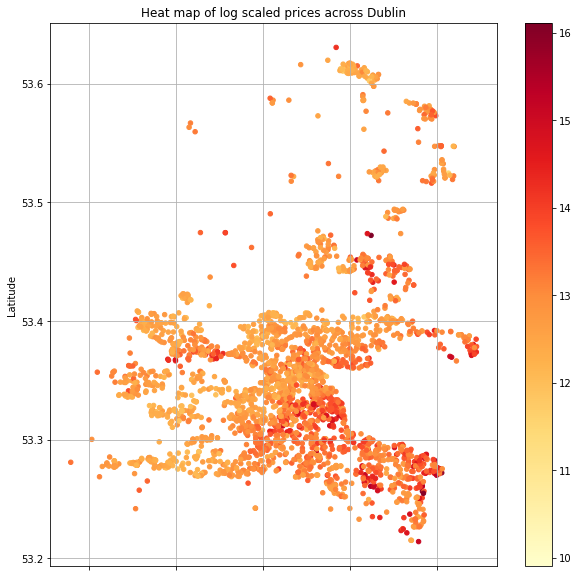

In [28]:
# Log transforming the price to remove heat map sensitivity to outliers
df_train.plot.scatter(x = 'longitude', y = 'latitude', c = np.log(df_train['price']), cmap = 'YlOrRd', figsize = (10,10))
plt.title("Heat map of log scaled prices across Dublin")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

Map of Dublin:

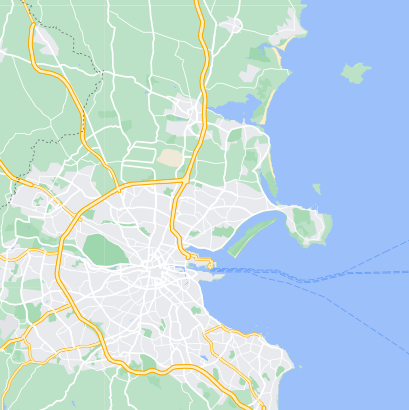

We can see that the latitude and longitude values are spread across Dublin and the price value representations map this out pretty well.

### Removing duplicate rows

We will now identify and remove any duplicate rows in the training data:

In [29]:
# Create a filter to identify the duplicate rows
duplicate_filter = df_train.duplicated(subset = ['bathrooms', 'beds', 'latitude', 'longitude', 'price', 'property_type', 'surface'], keep = False)

# Printing the number of duplicate rows identified
print(f"There are {df_train[duplicate_filter].iloc[:,0].count()} duplicate rows pre removal")

# Carrying out the removal of the duplicate rows
df_train = df_train.drop_duplicates(subset = ['latitude','longitude','price','surface'])

# Rerun the duplicate filter post removal
duplicate_filter = df_train.duplicated(subset = ['bathrooms', 'beds', 'latitude', 'longitude', 'price', 'property_type', 'surface'], keep = False)

# Printing the number of rows post removal
print(f"There are {df_train[duplicate_filter].iloc[:,0].count()} duplicate rows post removal")

There are 34 duplicate rows pre removal
There are 0 duplicate rows post removal


### Preparing 'surface' column - removal of outliers and imputing missing values

We will now prepare the surface column. We have seen above that there are some missing values in the column. We will deal with these missing values by imputing them. We will also deal with outliers in the surface column by imputing them also.

First we will see how many missing surface values in the training data:

In [30]:
print("Number of missing surface values in the training data:", df_train['surface'].isna().sum())

Number of missing surface values in the training data: 474


We will now identify the outliers in the surface column:

In [31]:
# Determine the rows with a surface outlier lower than 25 and above 5000
surface_outlier_filter = (df_train['surface'] < 25) | (df_train['surface'] > 5000)

# Printing the number of outliers for surface
df_train[surface_outlier_filter]

,bathrooms,beds,latitude,longitude,price,property_category,property_type,surface
88,1.0,4.0,53.474502,-6.343483,1100000.0,sale,bungalow,72236.38714
175,1.0,2.0,53.386540,-6.377356,425000.0,sale,bungalow,6705.00000
257,1.0,1.0,53.349797,-6.255832,225000.0,sale,studio,22.45000
1137,2.0,2.0,53.321254,-6.279637,499950.0,sale,semi-detached,8576.00000
1733,1.0,1.0,53.356068,-6.265947,200000.0,sale,apartment,3.40000
2300,1.0,1.0,53.369627,-6.247286,19995.0,sale,apartment,18.60000


We will now set the outlier surface values to NaN so that they will be imputed along with the missing values.

In [32]:
# Setting the values of the outliers to NaN so that their values will be imputed 
df_train.loc[surface_outlier_filter, 'surface'] = np.NaN

We can now impute the values using the values of the other columns:

In [33]:
# Creating a dataframe with which we can impute the missing surface values 
X = df_train[['bathrooms', 'beds', 'latitude', 'longitude', 'surface']].values

# Carrying out the uimputing using the Iterative Imputer
a = IterativeImputer(max_iter=10, random_state=0).fit_transform(X)

# Updating the surface column with any missing data
df_train['surface'] = a[:,4]

# Printing number of rows without a surface value
print(f"After imputing, there are now {df_train['surface'].isna().sum()} rows without surface values.")

After imputing, there are now 0 rows without surface values.


We can now sense check that all null values have been dealt with across the columns:

In [34]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

bathrooms            0
beds                 0
latitude             0
longitude            0
price                0
property_category    0
property_type        0
surface              0
dtype: int64

### Encoding data numerically

Because there are only 2 values present, we will now numerically encode the text based property_category column:

In [35]:
# Building the mapping of value to number
property_category_mapper = {}
for id, val in enumerate(df_train['property_category'].unique()):
    property_category_mapper[val] = id 
    
# Printing the created numerical mapping
print("The property_category values are mapped numerically as follows:", property_category_mapper)

# Updating the dataframe with the numerical mapping
df_train['property_category'].replace(property_category_mapper, inplace=True)

The property_category values are mapped numerically as follows: {'new_development_parent': 0, 'sale': 1}


### One hot encoding

We will now also one hot encode the property_type column which has a finite number of text based values:

In [36]:
# One hot encoding the property_type column
df_train = pd.get_dummies(df_train, columns=['property_type'], drop_first=False)

# Determining which features to use

We can use a correlation map to determine the columns which most strongly correlate to price. Choosing these columns will be beneficial for training the model to predict price. 

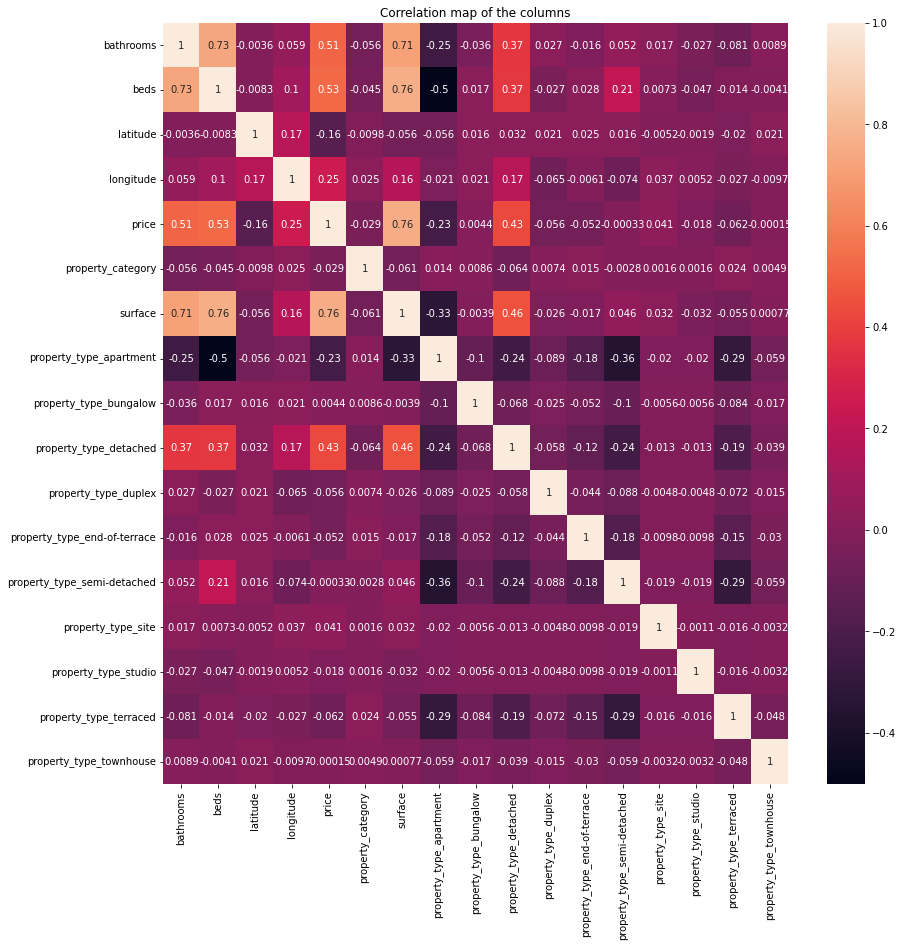

In [37]:
plt.figure(figsize=(14, 14))
plt.title("Correlation map of the columns")
sns.heatmap(df_train.corr(), annot=True);

Features showing the strongest correlation with price:
- surface => 0.76
- beds => 0.52
- bathrooms => 0.51
- property_type_detached => 0.43
- longitude => 0.25
- property_type_apartment => -0.23
- latitude => -0.16

The above features show useful correlations with house prices and will be included as features to train the model.

# Scaling data

We will now scale the data to the appropriate order of magnitude while also attempting to achieve a normal distribution for the variables:

We will first declare a function to assist with plotting distributions:

In [38]:
# Declaring utility function to assist with displaying the distributions of the variables
def plot_distributions(fig, column, x, y, z, df, bins=20):
    # Box Plot
    ax1 = fig.add_subplot(x, y, z)
    ax1.set_title(f"Boxplot of the {column} attribute")
    ax1.set_ylabel(column)
    df.boxplot(column=[column])
    
    # Histogram
    ax2 = fig.add_subplot(x, y, z+1)
    ax2.set_title(f"Histogram of the {column} attribute")
    ax2.set_xlabel(column)
    ax2.set_ylabel(f'Number of {column}')
    df[column].hist(bins=20) 

We will now check the distributions before carrying out any transforms necessary:

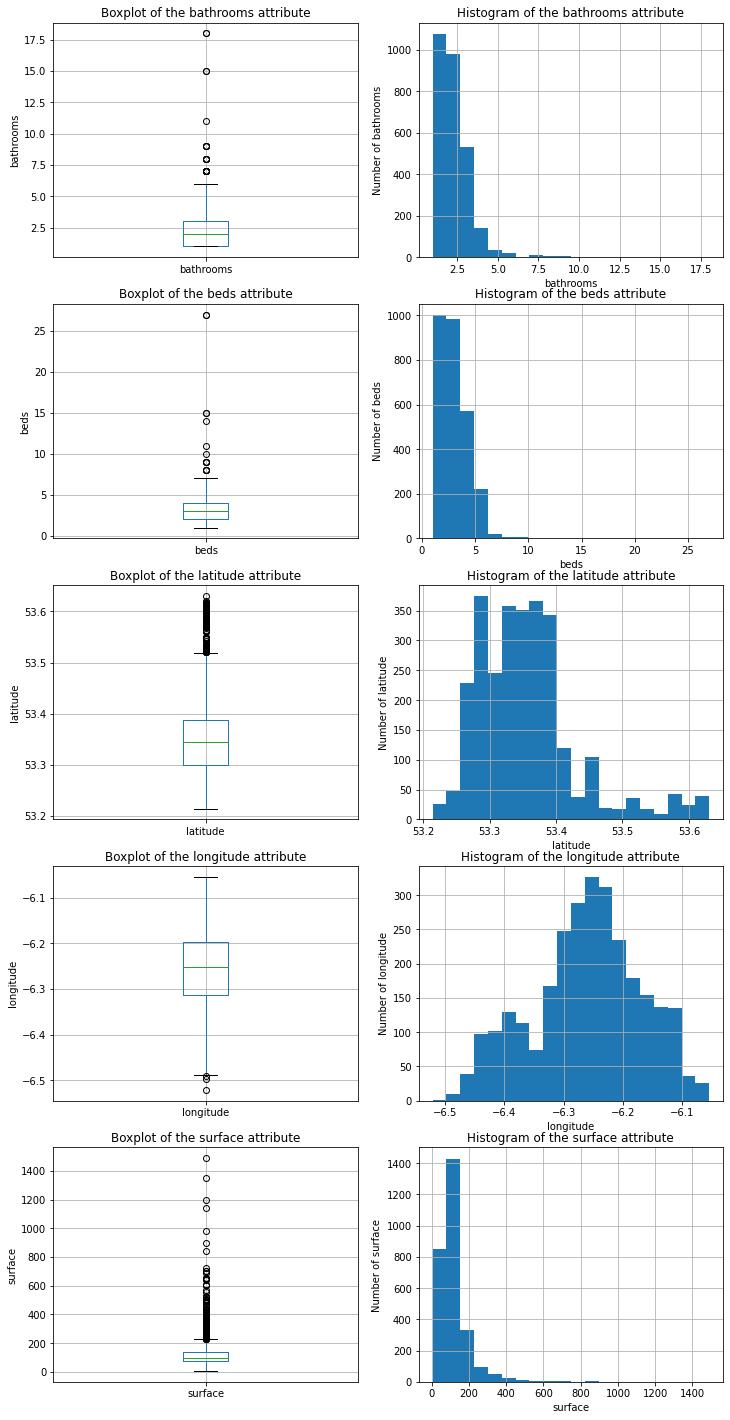

In [39]:
fig = plt.figure(figsize=(12, 25))
plot_distributions(fig, "bathrooms", 5, 2, 1, df_train)
plot_distributions(fig, "beds", 5, 2, 3, df_train)
plot_distributions(fig, "latitude", 5, 2, 5, df_train)
plot_distributions(fig, "longitude", 5, 2, 7, df_train)
plot_distributions(fig, "surface", 5, 2, 9, df_train)

We can see from the above that the beds, bathrooms and surface are all left skewed in terms of their distribution. To normalise these a bit more we will log transform these columns.

In [40]:
df_train['bathrooms'] = np.log(df_train['bathrooms'].astype('float'))
df_train['beds'] = np.log(df_train['beds'].astype('float'))
df_train['surface'] = np.log(df_train['surface'].astype('float'))

Replotting the distributions for these columns we should see that they are less left skewed:

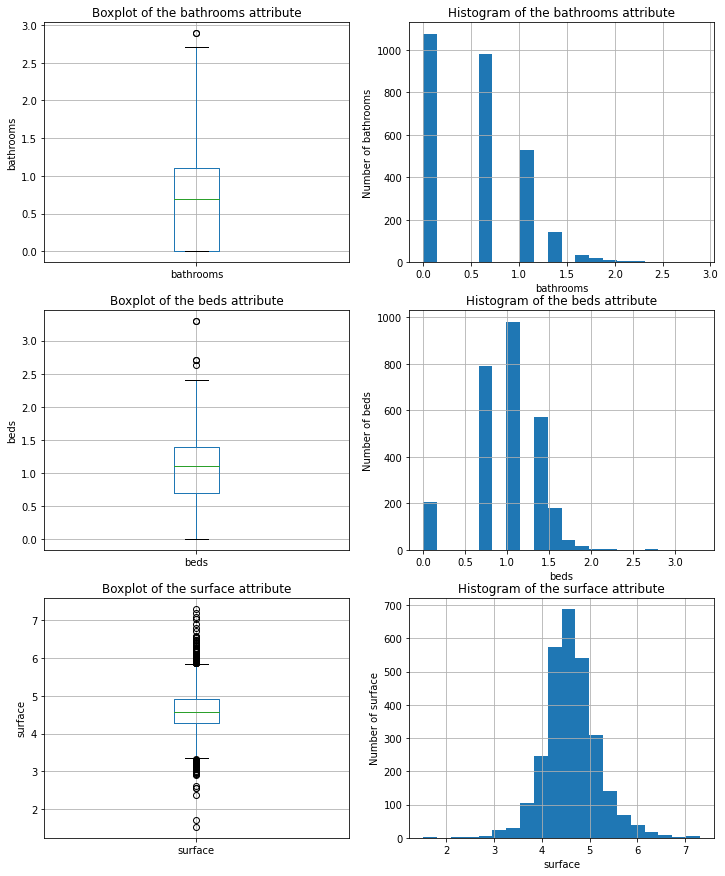

In [41]:
fig = plt.figure(figsize=(12, 15))
plot_distributions(fig, "bathrooms", 3, 2, 1, df_train)
plot_distributions(fig, "beds", 3, 2, 3, df_train)
plot_distributions(fig, "surface", 3, 2, 5, df_train)

While not perfect, the distribution of the data is now not as left skewed.

We will now standard scale the latitude, longitude columns to ensure they are of the same order of magnitude as the other features:

In [42]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so each column/feature/variable will have μ = 0 and σ = 1
standard_scaler_lat_long = StandardScaler().fit(df_train[['latitude', 'longitude']])
df_train[['latitude', 'longitude']] = standard_scaler_lat_long.transform(df_train[['latitude', 'longitude']])

### Preparing and Scaling the test data set

We will now prepare the chosen feature columns from the test set using the same steps as we did previously for training set:

In [43]:
# One hot encoding the property type column 
df_test = pd.get_dummies(df_test, columns=['property_type'], drop_first=False)

# Log transforming the left skewed columns
df_test['surface'] = np.log(df_test['surface'])
df_test['beds'] = np.log(df_test['beds'])
df_test['bathrooms'] = np.log(df_test['bathrooms'])

# Standard scaling the latitude and longitude columns
df_test[['latitude', 'longitude']] = standard_scaler_lat_long.transform(df_test[['latitude', 'longitude']])

# FULL MODEL AS A BASELINE

We will first train a full model on all the features, this will provide us with a baseline with which we can compare the performance of the piecewise models later. 

In [44]:
# Selecting the features upon which to train the models

# Training data
featrain = ['longitude', 'latitude', 'surface', 'beds', 'bathrooms', 'property_type_detached', 'property_type_apartment', 'price']
df_subset_train = df_train[featrain]

# Test data
featest = ['longitude', 'latitude', 'surface', 'beds', 'bathrooms', 'property_type_detached', 'property_type_apartment']
df_subset_test  =  df_test[featest]

# True price for test data
df_true_price = df_test[df_cost.index.isin(df_subset_test.index)].price

Making a final validation that there are no null values in the features:

In [45]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_true_price dataset: ',df_true_price.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0
Number of nan in df_true_price dataset:  0


Now we will extract the appropriate training and test values from the appropriate dataframes

In [46]:
# Training set, taking the input columns added and excluding the true price values
Xn_train = df_subset_train.iloc[:,0:-1].values 
# Training set true prices, taking the output price column from the end
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xn_test = df_subset_test.iloc[:,0:].values 
# test set, output column, true price
y_test = df_true_price.values

Now we will scale the true price appropriately by first log transforming before then standard scaling: 

In [47]:
# Applying the log transform to the price
log_of_price_train = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(log_of_price_train)
yn_train = yscaler.transform(log_of_price_train)

We will now perfrom the Multinomial Logistic Regression by instantiating and refining the parameters available in the linear equations. Namely:

 - $\alpha$, which is the intercept term:
 - $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature.

Initially a wide guess will be taken for the parameters, which will then be honed.


In [48]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Alpha and beta are now instantiated and a normal confidence interval honed for the data. With that is place we will now fit the model to the data.

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 2,377.4


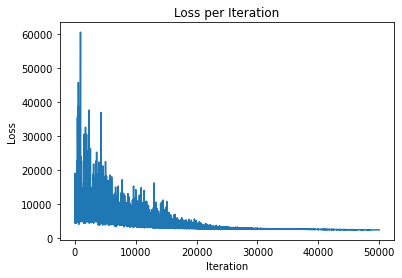

In [49]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

We can see from the above plot that our model converged successfully.

Now we will declare the number of draws to take for the posterior

In [50]:
# samples from the posterior
posterior = approximation.sample(5000)

We can now obtain the MAE and MAPE to form a baseline performance:

In [51]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  194098.80163800024
MAPE =  0.26509929857559966


# PIECEWISE REGRESSION

We will first perform clustering before training models for each of the clusters.

## Clustering

We will now perform clustering of the dataset. We will be clustering by the latitude and longitude take attributes of the houses. The optimal number of clusters will first be determined.  

### Examining how many clusters to use

We will perform k-means clustering in conjuction with the elbow method to find a starting point for how many clusters to use. 

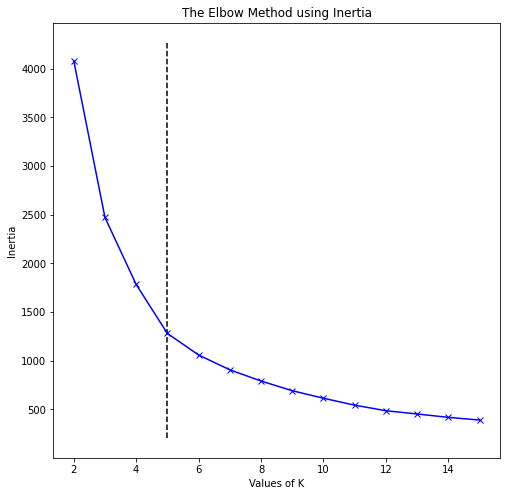

In [52]:
# clustering by the features latitude an longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])

silhouette_coefficients = []
inertias = []
K = range(2, 16)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_ind)
    inertias.append(kmeanModel.inertia_)
    silhouette_coefficients.append(silhouette_score(X_ind, kmeanModel.labels_))
 
# Locate the knee
kn = KneeLocator(K, inertias, curve='convex', direction='decreasing')

plt.figure(figsize=(8, 8))
plt.plot(K, inertias, 'bx-')
y_lim = plt.ylim()
plt.vlines(kn.knee, y_lim[0], y_lim[1], linestyles='dashed', colors='k')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the above knee location, we can see that the optimal knee location is around 5 clusters. 

We will now assess the silhouette plot:

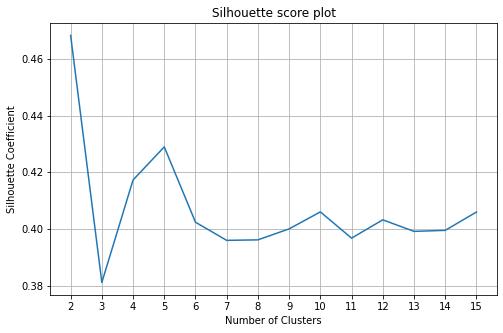

In [53]:
plt.figure(figsize=(8,5))
plt.title("Silhouette score plot")
plt.plot(range(2,16), silhouette_coefficients)
plt.xticks(range(2, 16))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

The silhouette plot is also indicating that a cluster number in the region of 5 would be suitable.

Upon various trials it was determined that a cluster number of 6 was optimal for the piecewise regression method given the chosen features and so will be used below:

### Performing Clustering

Clustering will now be performed on the dataset using a Gaussian Mixture model

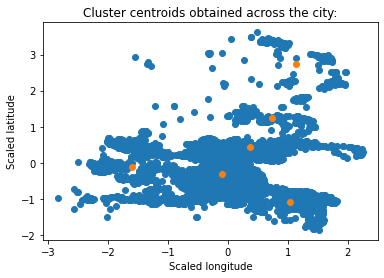

In [54]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)

# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])
plt.title("Cluster centroids obtained across the city:")
plt.xlabel("Scaled longitude")
plt.ylabel("Scaled latitude")
plt.show()

### Clusters

We will now use the clustering model to separate the training data into the appropriate cluster:

In [55]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
print(f"Makeup of training data clusters: {dict(zip(unique_train, counts_train))}")

Makeup of training data clusters: {0: 1149, 1: 183, 2: 497, 3: 425, 4: 397, 5: 157}


We can see from the above that each cluster has enough training data points

We will do the same for the test clusters:

In [56]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)

print(f"Makeup of training data clusters: {dict(zip(unique_test, counts_test))}")

Makeup of training data clusters: {0: 228, 1: 44, 2: 63, 3: 53, 4: 84, 5: 28}


We can again see that each cluster is well represented with test data points.

Separating the data out into cluster variables:

In [57]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [58]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [59]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [60]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [61]:
# cluster 4
Xn4 = Xn_train[clusters_train==4,:]
Xtestn4 = Xn_test[clusters_test==4,:]
ylog4 = np.log(ys_train.astype('float')[clusters_train==4,:])
yscaler4 = StandardScaler().fit(ylog4)
yn4 = yscaler4.transform(ylog4)

In [62]:
# cluster 5
Xn5 = Xn_train[clusters_train==5,:]
Xtestn5 = Xn_test[clusters_test==5,:]
ylog5 = np.log(ys_train.astype('float')[clusters_train==5,:])
yscaler5 = StandardScaler().fit(ylog5)
yn5 = yscaler5.transform(ylog5)

## Piecewise Model

We will now perform the Multinomial Logistic Regression on the various cluster datasets instantiated above. We will be instantiating and refining the parameters available in the linear equations. Namely:

 - $\alpha$, which is the intercept term:
 - $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature.
 
Initially a wide guess will be taken for the parameters which will then be honed.

In [63]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 989.27


In [64]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 244.45


In [65]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 507.55


In [66]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 361


In [67]:
# model_4
with pm.Model() as model4:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn4.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn4[:,0])
    
with model4:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior4 = approximation.sample(5000)

Finished [100%]: Average Loss = 372.73


In [68]:
# model_5
with pm.Model() as model5:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn5.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn5[:,0])
    
with model5:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior5 = approximation.sample(5000)

Finished [100%]: Average Loss = 192.03


We will now create a helper function to help us perform the posterior predictive checks:

In [69]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

##Simulations

We will now perform simulations using the posteriors of the models. This is useful to show the the distribution of our model's predictions versus the true obervations: 

### Only Cluster 0

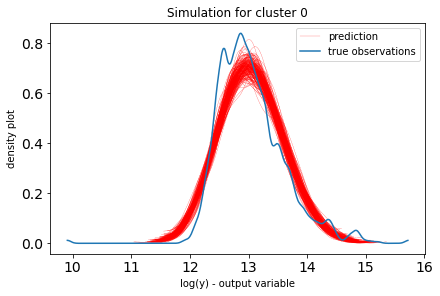

In [70]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 0")
plt.show()

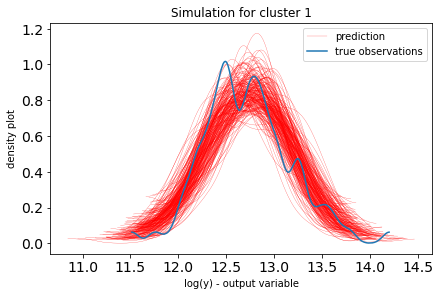

In [71]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 1")
plt.show()

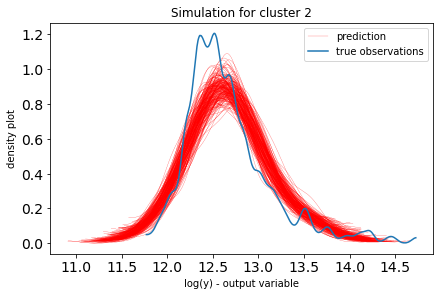

In [72]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 2")
plt.show()

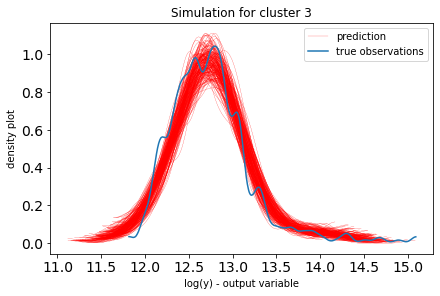

In [73]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 3")
plt.show()

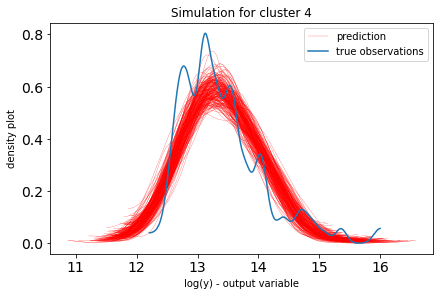

In [74]:
#Simulation
Ypred4 = yscaler4.inverse_transform(ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200))
for i in range(Ypred4.shape[0]):
    az.plot_dist( Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred4[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog4,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 4")
plt.show()

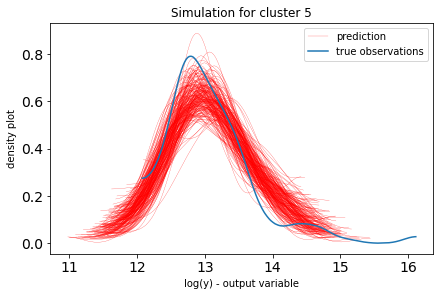

In [75]:
#Simulation
Ypred5 = yscaler5.inverse_transform(ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200))
for i in range(Ypred5.shape[0]):
    az.plot_dist( Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred5[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
az.plot_dist(ylog5,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Simulation for cluster 5")
plt.show()

## Overall Simulation

We can now perform an overall simulation by combining the various model predictions agains the true values:

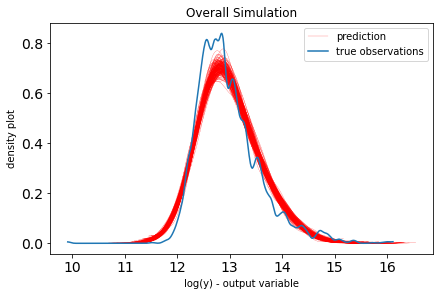

In [76]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xn4,  nsamples=200)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xn5,  nsamples=200)


# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler4.inverse_transform(Ypred5),
                 ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3, ylog4, ylog5])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Overall Simulation")
plt.show()

## Test set performance

We will now calculate the test performance of the piecewise approach for the test set:

In [77]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("------------------------")
print("CLUSTER 0")
print(f"Size: {np.sum(clusters_test==0)}")
print(f"MAE: {np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0])}")
print("------------------------")

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("------------------------")
print("CLUSTER 1")
print(f"Size: {np.sum(clusters_test==1)}")
print(f"MAE: {np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1])}")
print("------------------------")

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("------------------------")
print("CLUSTER 2")
print(f"Size: {np.sum(clusters_test==2)}")
print(f"MAE: {np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2])}")
print("------------------------")

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("------------------------")
print("CLUSTER 3")
print(f"Size: {np.sum(clusters_test==3)}")
print(f"MAE: {np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3])}")
print("------------------------")

# cluster 4
y_pred_BLR4 = np.exp(yscaler4.inverse_transform(np.mean(posterior4['alpha']) 
              + np.dot(np.mean(posterior4['beta'],axis=0), Xtestn4.T)))
print("------------------------")
print("CLUSTER 4")
print(f"Size: {np.sum(clusters_test==4)}")
print(f"MAE: {np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4])}")
print("------------------------")

# cluster 5
y_pred_BLR5 = np.exp(yscaler5.inverse_transform(np.mean(posterior5['alpha']) 
              + np.dot(np.mean(posterior5['beta'],axis=0), Xtestn5.T)))
print("------------------------")
print("CLUSTER 5")
print(f"Size: {np.sum(clusters_test==5)}")
print(f"MAE: {np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]))}")
print(f"MAPE: {np.mean(abs(y_pred_BLR5 - y_test[clusters_test==5]) /y_test[clusters_test==5])}")
print("------------------------")

# joint MAE
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3]),
                 abs(y_pred_BLR4 - y_test[clusters_test==4]),
                 abs(y_pred_BLR5 - y_test[clusters_test==5])
                 ])

# joint MAPE
joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - y_test[clusters_test==0]) /y_test[clusters_test==0],
                        abs(y_pred_BLR1 - y_test[clusters_test==1]) /y_test[clusters_test==1],
                        abs(y_pred_BLR2 - y_test[clusters_test==2]) /y_test[clusters_test==2],
                        abs(y_pred_BLR3 - y_test[clusters_test==3]) /y_test[clusters_test==3],
                        abs(y_pred_BLR4 - y_test[clusters_test==4]) /y_test[clusters_test==4],
                        abs(y_pred_BLR5 - y_test[clusters_test==5]) /y_test[clusters_test==5],
                       ]))

print("------------------------")
print("JOINT PERFORMANCE")
# MAE
print("MAE:",np.mean(joint))
# MAPE
print("MAPE:",joint_mape)
print("------------------------")

------------------------
CLUSTER 0
Size: 228
MAE: 213872.57395146368
MAPE: 0.2512013076739915
------------------------
------------------------
CLUSTER 1
Size: 44
MAE: 103607.89409997733
MAPE: 0.287236954365747
------------------------
------------------------
CLUSTER 2
Size: 63
MAE: 156615.88813408074
MAPE: 0.25686309531178886
------------------------
------------------------
CLUSTER 3
Size: 53
MAE: 74297.79670566882
MAPE: 0.18858821692687483
------------------------
------------------------
CLUSTER 4
Size: 84
MAE: 244442.39825858056
MAPE: 0.2397240773836687
------------------------
------------------------
CLUSTER 5
Size: 28
MAE: 188298.41885862293
MAPE: 0.2794198687545561
------------------------
------------------------
JOINT PERFORMANCE
MAE: 185863.59112188494
MAPE: 0.24810090693777148
------------------------


### PPC on the Test set

Finally we will create a simulation plot for the test data:

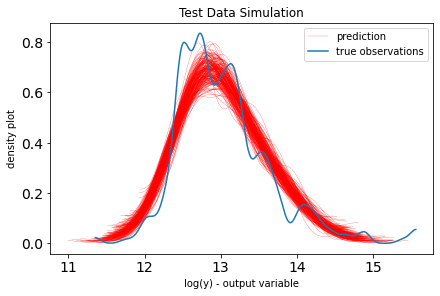

In [78]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)
Ypred4 = ppc(posterior4['alpha'],posterior4['beta'],posterior4['sigma_n'],Xtestn4, nsamples=num_samples2)
Ypred5 = ppc(posterior5['alpha'],posterior5['beta'],posterior5['sigma_n'],Xtestn5, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3),
                 yscaler4.inverse_transform(Ypred4),
                 yscaler5.inverse_transform(Ypred5),
                 ])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");
plt.title("Test Data Simulation")
plt.show()

# SUMMARY

Firstly, the data was imported to pandas data frames. Upon some exploratory analysis it was found that that some columns would be of more interest than others to use as features. An assumption was made that rows with missing bathrooms or beds were unliveable and so samples where this occurred were removed from the training data. For some columns, such as ber_classification, facility and no_of_units, the columns were removed because there was a large amount of data missing. Text based columns such as description_block and features were removed as natural language processing was out of scope for the etivity. The columns county and environment were not included because all the training samples consisted of the same values for these fields and would not therefore be a useful predictor of price. The area column was dropped in favour of latitude and longitude which were deemed to contain more accurate location data. Rows where the target price were null were also removed as these examples would not be useful for model training. Outliers were also dealt with for example some latitude and longitude values showing u for different cities other than Dublin. It could be seen that some data points were entered in the training data twice, with identical values. These duplicate rows were also found and removed. 

In the case of the surface attribute, a manageable number of datapoints were missing. It was decided to impute these values based on the values present in the other columns where surface data did exist. This allowed us to retain a useful feature which showed good correlation as a predictor of house prices. 
Plotting a heat map of the house prices versus longitude and latitude was a useful endeavour as it gave an intuitive spread of the properties being dealt with versus a map of the actual city and county of Dublin. This was a topic of discussion within our group where we found that the plot did indeed match to the map of Dublin which added to our intuition of the dataset.

The data was encoded ordinally in the case of property_category and one hot encoded in the case of the property_type. After discussing with team members Robert, Anthony, Mike and Raymond, a correlation heatmap was used to determine the available features which were the most useful predictors of the price attribute. It was discussed with Mike Scally that there were additional approaches available such as first training a cruder model like a random forest regressor to determine the features of most interest. However the correlation heatmap proved adequate for our needs.

Features showing the strongest correlation with price:

 - surface => 0.76
 - beds => 0.52
 - bathrooms => 0.51
 - property_type_detached => 0.43
 - longitude => 0.25
 - property_type_apartment => -0.23
 - latitude => -0.16

The above features show useful correlations with house prices and will be included as features to train the model.
By plotting boxplots and histograms of the numerical features it was seen that some were left skewed and with varying magnitudes. Log transforms were applied on some features to shift the distributions to appear more normal. The standard scaler was also used in some cases to bring the features into similar domains in terms of magnitude.  

A full Bayesian Linear Regression model was first trained on the entire dataset for the features. This model was used as a baseline to measure performance. The model was trained and tested against the test set to determine both the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE) which as stated in the introduction are commonly used approaches to provide model performance metrics (Botchkarev, 2019). 

The piecewise approach was then undertaken. The optimal number of clusters to use was honed in upon using the k-means algorithm in conjunction with the elbow method and the silhouette method (Umargono, Suseno and S. K., 2019). Both approaches were indicating that a cluster number of 5 was likely to be about right. Upon trial and error and retraining of the models over several iterations I decided that 6 clusters was optimal for the chosen features, and this was the number of clusters used for the etivity. It was discussed with Robert Barrett how there could be other means by which we could visually examine how many clusters to use such as MDS and t-SNE. However, because the clustering was taking place on human intuitive space of longitude and latitude, this was not required, and the chosen methods sufficed.

Gaussian Mixture clustering (Melchior and Goulding, 2018), which is an unsupervised clustering method, was chosen to cluster the data based on latitude and longitude. With the clusters obtained the models were retrained on the subsets of data as is standard in the piecewise approach (Germano, 2020). Again, the MAE and MAPE scores were obtained both for the models individually and collectively. 

Useful simulations were also carried out which compared a range of predicted price values using the posteriors with the actual price values from the dataset. These plots are very useful and intuitive and showed that the model was able to smooth out the noisier true distributions. 

Baseline Full Model Performance

 - MAE:  194098.80163800024
 - MAPE: 0.26509929857559966

Piecewise Model Performance

 - MAE:  185863.6
 - MAPE: 0.2481

We can see from the above metrics that the piecewise method gives a performance improvement over the single model trained on the entire training set. From discussions with my team, this performance improvement obtained by the piecewise model is comparatively promising. 
As indicated by Germano (2020), the model was able to capitalise on the fact that there were slightly different relationships between the variables in each cluster. Each model could then specialise on its own data cluster and adapt to the nuances it contained. The baseline model was slightly over generalising across the dataset because it consisted of a single universal model. As discussed with Robert Barrett in the forum, piecewise models allow us to home in on variance within the clusters yet maintain an overview on the more general trends. The trade-off however still exists between bias and variance, with the risk of underfitting being mitigated by the more nuanced models but leading into a risk of overfitting if we use too many constituent clusters.

When carrying out various runs and when trialling different numbers of piecewise clusters, it was seen that it was important to make sure that each cluster was sufficiently represented in terms of data examples. In cases where there a cluster only had a few training examples the model was not able to generalise well. If this occurred, the effects could be clearly seen manifesting themselves on the simulation plots. The plots in this case would not form a nice coherent normal distribution and would instead appear a lot more random in nature. This issue was identified upon analysing the initial submission of Team 3 and discussed with them in the forum.

I discussed with my team the reasoning as to why the Half Cauchy distribution was used rather than a normal distribution for sigma. I explained on the forum that for sigma we will only ever expect a positive value rather than the negative values that would be possible for alpha and beta using a normal distribution. The Half Cauchy distribution will only ever provide us with a positive distribution which is what we want for sigma values.


# References

Ahtesham, M., Bawany, N.Z. and Fatima, K. (2020) ‘House Price Prediction using Machine Learning Algorithm - The Case of Karachi City, Pakistan’, in 2020 21st International Arab Conference on Information Technology (ACIT). 2020 21st International Arab Conference on Information Technology (ACIT), pp. 1–5. doi:10.1109/ACIT50332.2020.9300074.

Botchkarev, A. (2019) ‘Performance Metrics (Error Measures) in Machine Learning Regression, Forecasting and Prognostics: Properties and Typology’, Interdisciplinary Journal of Information, Knowledge, and Management, 14, pp. 045–076. doi:10.28945/4184.

Germano, M.F. (2020) Piecewise Linear Regression Model. What Is It and When Can We Use It?, Medium. Available at: https://towardsdatascience.com/piecewise-linear-regression-model-what-is-it-and-when-can-we-use-it-93286cfee452 (Accessed: 1 October 2021).

Koehrsen, W. (2018) Introduction to Bayesian Linear Regression, Medium. Available at: https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7 (Accessed: 29 September 2021).

Melchior, P. and Goulding, A.D. (2018) ‘Filling the gaps: Gaussian mixture models from noisy, truncated or incomplete samples’, Astronomy and Computing, 25, pp. 183–194. doi:10.1016/j.ascom.2018.09.013.

Minka, T.P. (1999) Bayesian Linear Regression. 3594 Security Ticket Control.

Morissette, L. and Chartier, S. (2013) ‘The k-means clustering technique: General considerations and implementation in Mathematica’, Tutorials in Quantitative Methods for Psychology, 9, pp. 15–24. doi:10.20982/tqmp.09.1.p015.

Nasteski, V. (2017) ‘An overview of the supervised machine learning methods’, HORIZONS.B, 4, pp. 51–62. doi:10.20544/HORIZONS.B.04.1.17.P05.

Salvatier, J., Wiecki, T.V. and Fonnesbeck, C. (2016) ‘Probabilistic programming in Python using PyMC3’, PeerJ Computer Science, 2, p. e55. doi:10.7717/peerj-cs.55.

‘Segmented regression’ (2021) Wikipedia. Available at: https://en.wikipedia.org/w/index.php?title=Segmented_regression&oldid=1030201444 (Accessed: 1 October 2021).

Umargono, E., Suseno, J.E. and S. K., V.G. (2019) ‘K-Means Clustering Optimization using the Elbow Method and Early Centroid Determination Based-on Mean and Median’:, in Proceedings of the International Conferences on Information System and Technology. International Conferences on Information System and Technology, Yogyakarta, Indonesia: SCITEPRESS - Science and Technology Publications, pp. 234–240. doi:10.5220/0009908402340240.

Yang, X. et al. (2019) ‘Piecewise Linear Regression Based on Plane Clustering’, IEEE Access, 7, pp. 29845–29855. doi:10.1109/ACCESS.2019.2902620.




